# orbit

> Compute orbital position

In [ ]:
#| default_exp orbit

In [ ]:
#| export
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#| export
def distance(true_anomaly, semi_maj_axis, eccentricity):
    """
    true_anomaly: radians
    semi_maj_axis: ellipse's semi major axis
    eccentricity: ellipse's eccentricity
    """
    d = semi_maj_axis * (1 - eccentricity ** 2) / (1 + eccentricity * np.cos(true_anomaly))
    return d

Text(0.5, 0.98, 'semi_maj_axis: 40000   eccentricity: 0.5')

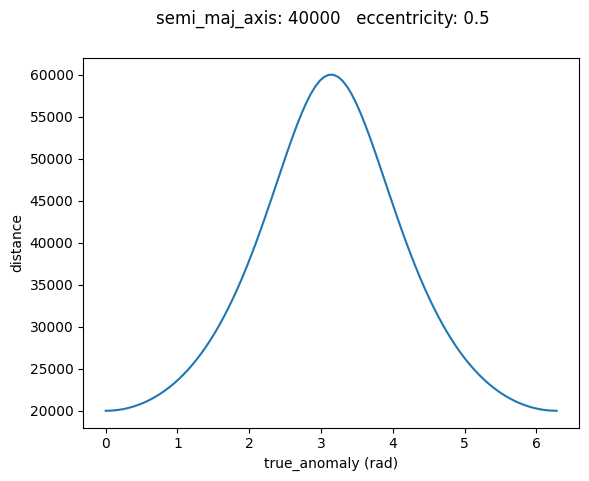

In [ ]:
plt.figure()
plt.plot(np.linspace(0, np.pi*2, 100), distance(np.linspace(0, np.pi*2, 100), 40000, 0.5))
plt.xlabel("true_anomaly (rad)")
plt.ylabel("distance")
plt.suptitle(f"semi_maj_axis: {40000}   eccentricity: {0.5}")

In [ ]:
assert distance(np.pi, 40000, 0.5) == 60000
assert distance(np.pi*2, 40000, 0.5) == 20000
assert distance(np.pi/4, 40000, 0.5) == 22163.883751087757
assert len(distance(np.arange(4568), 40000, 0.5)) == 4568  # Can provide true_anomaly as 1D array

In [ ]:
#| export
def mean_anomaly(days, orbit_duration):
    """
    days: number of days since last perihelion
    orbit_duration: duration of an orbit in days
    """
    return np.pi * 2 * days / orbit_duration

def days_since_perihelion(mean_anomaly, orbit_duration):
    """
    days: number of days since last perihelion
    orbit_duration: duration of an orbit in days
    """
    return mean_anomaly * orbit_duration / (np.pi * 2)

Text(0.5, 0.98, 'orbit_duration: 100')

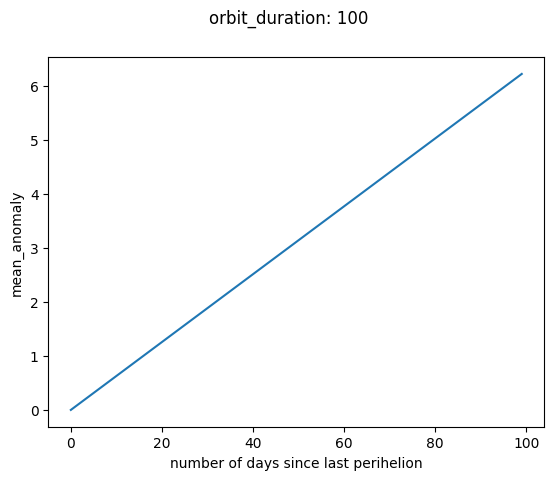

In [ ]:
plt.figure()
plt.plot(np.arange(100), mean_anomaly(np.arange(100), 100))
plt.xlabel("number of days since last perihelion")
plt.ylabel("mean_anomaly")
plt.suptitle(f"orbit_duration: {100} days")

Text(0.5, 0.98, 'orbit_duration: 100 days')

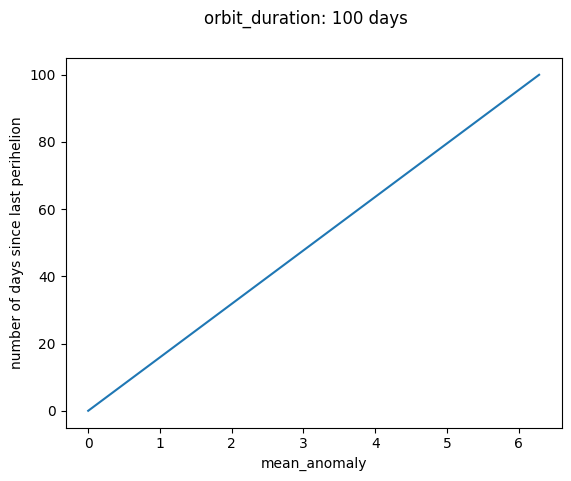

In [ ]:
plt.figure()
plt.plot(np.linspace(0, np.pi * 2, 100), days_since_perihelion(np.linspace(0, np.pi * 2, 100), 100))
plt.xlabel("mean_anomaly")
plt.ylabel("number of days since last perihelion")
plt.suptitle(f"orbit_duration: {100} days")

In [ ]:
assert mean_anomaly(300.25, 686.97) * 180 / np.pi == 157.34311541988734
assert days_since_perihelion(np.pi, 100) == 50

In [ ]:
#| export
def equation_of_center_mean_anomally(mean_anomaly, eccentricity):
    """
    Ec = trueAnomally - meanAnomally
    """
    e = eccentricity
    ma = mean_anomaly
    eq_c = 2*e*np.sin(ma) + 5*e**2/4*np.sin(2*ma) + e**3/12*(13*np.sin(3*ma) - 3*np.sin(ma))
    return eq_c

def equation_of_center_true_anomally(true_anomaly, eccentricity):
    """
    Ec = trueAnomally - meanAnomally
    """
    e = eccentricity
    ta = true_anomaly
    eq_c = 2*e*np.sin(ta) + (3*e**2/4 + e**4/8)*np.sin(2*ta) - e**3/3*np.sin(3*ta) + 5*e**4/32*np.sin(4*ta)
    return eq_c

In [ ]:
#| export
def true_anomally(eccentric_anomaly, eccentricity):
    return np.atan(((1+eccentricity)/(1-eccentricity))**(1/2) * np.tan(eccentric_anomaly/2)) * 2

def eccentric_anomally_inv(true_anomally, eccentricity):
    return np.atan(((1-eccentricity)/(1+eccentricity))**(1/2) * np.tan(true_anomally/2)) * 2

In [ ]:
assert true_anomally(np.pi/4, 0.5) == 1.2446686345053115
assert eccentric_anomally_inv(1.2446686345053115, 0.5) == 0.7853981633974482  # almost pi/4

<matplotlib.legend.Legend>

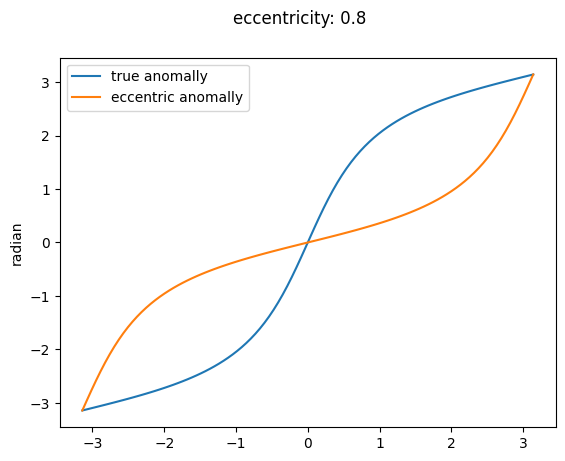

In [ ]:
eccentricity = .8
plt.figure()
plt.plot(np.linspace(-np.pi, np.pi, 100), true_anomally(np.linspace(-np.pi, np.pi, 100), eccentricity), label="true anomally")
plt.plot(np.linspace(-np.pi, np.pi, 100), eccentric_anomally_inv(np.linspace(-np.pi, np.pi, 100), eccentricity), label="eccentric anomally")
plt.ylabel("radian")
plt.suptitle(f"eccentricity: {eccentricity}")
plt.legend()

In [ ]:
#| export
# Kepler equation:
# meanAnomally = eccentric_anomally - eccentricity * sin(eccentric_anomally)
def eccentric_anomally(mean_anomally, eccentricity, precision=.000001, method="newton-raphson"):
    """
    method: kepler or newton-raphson
    """
    change = np.inf
    ea = mean_anomally
    
    if method == "kepler":
        while(change > precision):
            new_ea = mean_anomally + eccentricity * np.sin(ea)
            change = abs(ea - new_ea)
            ea = new_ea
            
    elif method == "newton-raphson":
        if eccentricity > 0.75:
            ea = np.pi
        while(change > precision):
            new_ea = ea - (ea - eccentricity*np.sin(ea) - mean_anomally)/(1 - eccentricity*np.cos(ea))
            change = abs(ea - new_ea)
            ea = new_ea
    return ea

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()